<a href="https://colab.research.google.com/github/VojtechVidensky/MPA-MLF/blob/main/Project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

import os
import random
from PIL import Image
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_train_dir = '/content/drive/MyDrive/MLF_Final_project/Train_data/train_data_unlabeled/'
image_test_dir = '/content/drive/MyDrive/MLF_Final_project/Test_data/test_data_unlabeled/'
csv_file_path = '/content/drive/MyDrive/MLF_Final_project/y_train.csv'

In [4]:
labels_df = pd.read_csv(csv_file_path)
labels_df.index = labels_df.index + 1
print(labels_df.head())

   id  target
1   0       0
2   1       1
3   2       0
4   3       2
5   4       2


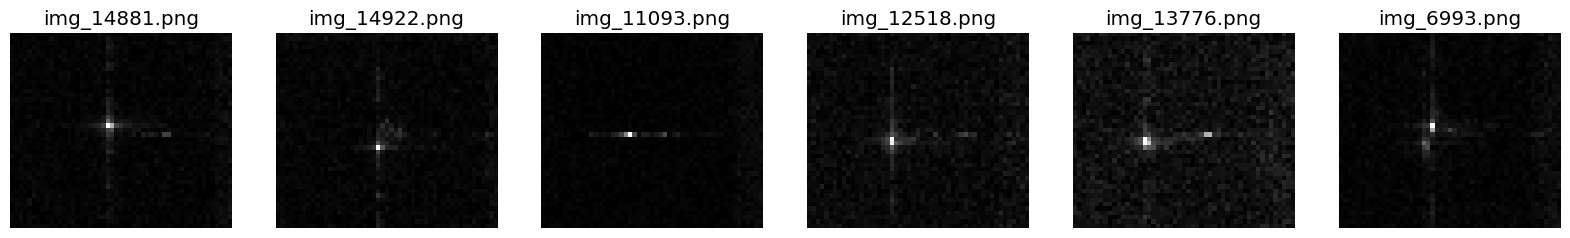

In [5]:
def show_random_images(image_dir, num_images=6):
    images = os.listdir(image_dir)
    selected_images = random.sample(images, num_images)

    plt.figure(figsize=(20, 10))
    for i, image_name in enumerate(selected_images):
      image_path = os.path.join(image_dir, image_name)
      image = Image.open(image_path)
      monochrome_image = image.convert('L')
      plt.subplot(1, num_images, i+1)
      plt.imshow(monochrome_image, cmap='gray')
      plt.axis('off')
      plt.title(image_name)
    plt.show()

show_random_images(image_train_dir)

In [6]:
images = []
labels = []

image_height = 128
image_width = 128

for index, row in labels_df.iterrows():
    image_path = os.path.join(image_train_dir, 'img_' + str(row['id'] + 1) + '.png')
    image = load_img(image_path, target_size=(image_height, image_width), color_mode='grayscale')
    image = img_to_array(image)
    images.append(image)
    labels.append(row['target'])

images = np.array(images)
labels = np.array(labels)

images = images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)



In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

In [26]:
history = model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/15
405/405 [==============================] - 17s 21ms/step - loss: 0.5937 - accuracy: 0.7524 - val_loss: 0.3482 - val_accuracy: 0.8579
Epoch 2/15
405/405 [==============================] - 7s 17ms/step - loss: 0.2782 - accuracy: 0.8925 - val_loss: 0.2261 - val_accuracy: 0.9113
Epoch 3/15
405/405 [==============================] - 7s 18ms/step - loss: 0.1702 - accuracy: 0.9356 - val_loss: 0.1961 - val_accuracy: 0.9302
Epoch 4/15
405/405 [==============================] - 7s 17ms/step - loss: 0.1169 - accuracy: 0.9559 - val_loss: 0.1553 - val_accuracy: 0.9410
Epoch 5/15
405/405 [==============================] - 7s 18ms/step - loss: 0.0778 - accuracy: 0.9714 - val_loss: 0.1440 - val_accuracy: 0.9496
Epoch 6/15
405/405 [==============================] - 7s 17ms/step - loss: 0.0527 - accuracy: 0.9795 - val_loss: 0.2073 - val_accuracy: 0.9320
Epoch 7/15
405/405 [==============================] - 7s 18ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.1775 - val_accuracy: 0.950

In [27]:
test_images = []
for img_name in os.listdir(image_test_dir):
    img_path = os.path.join(image_test_dir, img_name)
    img = load_img(img_path, target_size=(image_height, image_width), color_mode='grayscale')
    img = img_to_array(img)
    test_images.append(img)

test_images = np.array(test_images) / 255.0

In [28]:
val_loss, val_acc = model.evaluate(val_images, val_labels)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

102/102 [==============================] - 1s 7ms/step - loss: 0.1945 - accuracy: 0.9549
Validation loss: 0.19447648525238037
Validation accuracy: 0.9548965096473694
